# "50 Стартапов"

### Необходимо найти, в какие стартапы выгоднее всего вложиться (какие принесут максимальную прибыль). Задача регрессии.

## Описание задачи


## Часть 0: Введение

### Описание
В датасете мы видим информацию о 50 разных стартапах. Нам представлены следующие столбцы:  “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.
    
**Метаданные:**
    
* **ID** - ID стартапа

* **R&D Spend** - сколько каждый стартап тратит на исследования и разработки

* **Administration** - сколько каждый стартап тратит на административные расходы

* **Marketing Spend** - сколько каждый стартап тратит на маркетинг

* **State** - в каком штате зарегистрирован стартап

* **Category** - к какой категории бизнеса относится стартап

* **Profit** - выручка стартапа
   

### Цель работы:
    

* #### Предсказать, в какие компании инвестировать для максимизации прибыли (выбрать модель с лучшим результатом, создать прогнозы, выбрать компании)


## Часть 1: Импорт библиотек, данных и всего необходимого для работы
* ###  Импорт библиотек, данных и всего необходимого для работы

## Часть2: Исследовательский анализ данных
* ### Информация
* ### Описание целевой переменной (описание + визуализация: график distplot)
* ### Числовые и категориальные данные
    * #### Перечень числовых и категориальных данных
* ### Пропущенные значения
    * #### Список пропущенных значений  
    * #### Заполнение и/или удаление пропущенных значений
* ### Числовые и категориальные данные: описание  
    * #### Визуализация

## Часть 3: Обработка и преобразование данных
* ### One-Hot Преобразование 
* ### Нормализация (опционально)
* ### Разбиение датасета на части (Train\test)

## Часть 4: Машинное обучение
* ### ML-модели (Линейная регрессия, Градиентный бустинг)
* ### Построение, тренировка, оценка and визуализация модели
* ### Создание финального предсказания для тестового набора
* ### Сравнение моделей машинного обучения


## Заключение
* ###  Сохранение предсказанных данных в csv-файле

## Part 1: Import, Load Data.

* ### Import 

In [100]:
# Импортируем библиотеки               

import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sb
from scipy import stats


# Импортируем модели и метрики
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

* ### Load Data

In [146]:
# Заберем данные из csv-файлов
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# Определим таргет
target = train['Profit']

50


## Part 2: Exploratory Data Analysis.

* ### Info

In [27]:
# Опишем тренировочный датасет
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [28]:
# Опишем тестовый датасет
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [29]:
# Посмотрим несколько первых строк из тренировочного датасета 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [30]:
# Посмотрим несколько первых строк из тестового датасета 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [31]:
# Опишем подробнее таргет (поле Profit)
target.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

C:\Users\sergo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


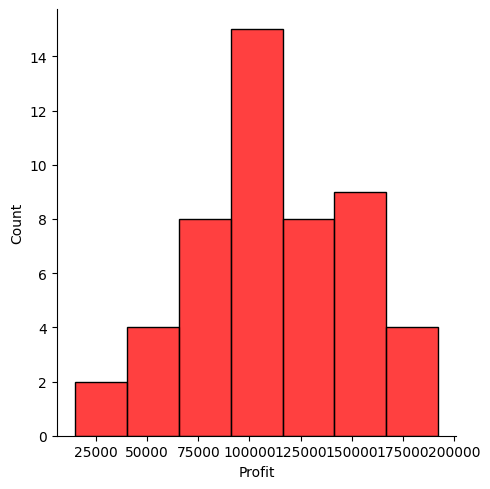

In [33]:
# Визуализируем распределение таргета
sb.displot(train['Profit'], color='r')

In [40]:
# Отправим ID в индекс, после проверим.
train = train.set_index('ID')
test = test.set_index('ID')

train.head()

,R&D Spend,Administration,Marketing Spend,State,Category,Profit
ID,,,,,,
0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [42]:
# Разобьем данные на числовые и категориальные
num_train = train.dtypes[train.dtypes != 'object'].index
obj_train = train.dtypes[train.dtypes == 'object'].index

print ('Numerical features:')
print(len(num_train), ": ", train[num_train].columns)
print()
print ('Categorical features:')
print(len(obj_train), ": ", train[obj_train].columns)

Numerical features:
4 :  Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Categorical features:
2 :  Index(['State', 'Category'], dtype='object')


* ### Missing values

#### List of data features with missing values

In [43]:
# Проверим тренировочный сет на пропущенные значения 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print(nan_columns)

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64
['R&D Spend', 'Marketing Spend', 'Category']


In [44]:
# Проверим тестовый сет на пропущенные значения 
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print(nan_columns)

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64
['R&D Spend', 'Administration', 'State']


#### Filling missing values

In [ ]:
Выполним замену пустых значений. Удалять строки не целесообразно, их и так мало.

* 'R&D Spend': Numerical - замена NAN на среднее значение ('mean');
* 'Administration': Numerical - замена NAN на среднее значение ('mean');
* 'Marketing Spend': Numerical - замена NAN на среднее значение ('mean');
* 'State': Categorical - замена NAN на 'None';
* 'Category': Categorical - замена NAN на 'None'.

In [53]:
 # Столбцы с числами, в которых встречаются пропущенные значения
nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
    ]

# замена 'NAN' на 'mean' в обоих сетах
for fld in nan_columns_fill:
    train.fillna(train[fld].mean(), inplace = True)  
    test.fillna(test[fld].mean(), inplace = True)


# Столбцы категориальные, в которых встречаются пропущенные значения
na_columns_fill = [
    'State', 
    'Category'
    ]

# замена 'NAN' на 'None' в обоих сетах
for col in na_columns_fill:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

In [54]:
# Проверим, сколько теперь пропущенных значений в Train
train.isnull().sum().sum()

0

In [55]:
# Проверим, сколько теперь пропущенных значений в Test
test.isnull().sum().sum()

0

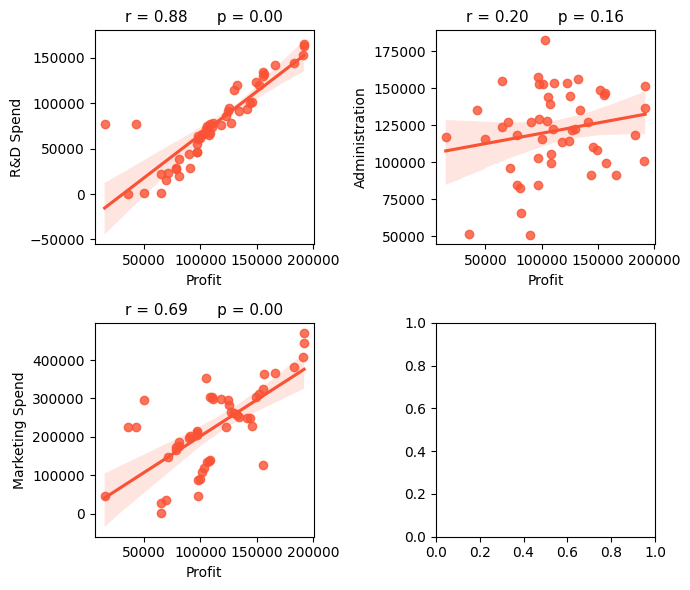

In [84]:
# Визуализация числовых данных
nr_rows = 2
nr_cols = 2

fig, axs = pl.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(num_train)
plot_num_feats = [c for c in list(num_feats) if c not in ['Id',  'Profit']]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sb.regplot(y=train[plot_num_feats[i]], x=train['Profit'], ax = axs[r][c], color = "#fa5234" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



pl.tight_layout()    
pl.show()

<Axes: xlabel='State', ylabel='Profit'>

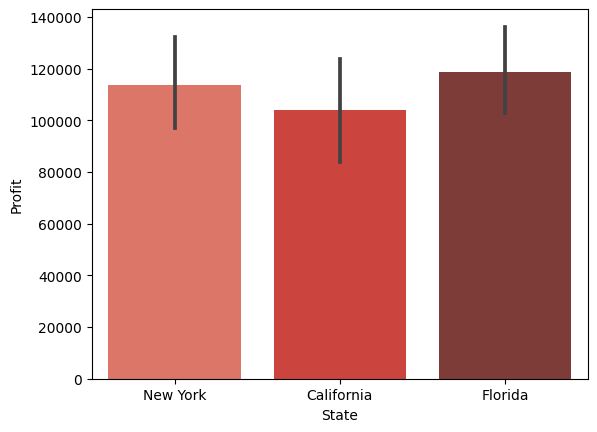

In [88]:
# Визуализация категориальных переменных
# Профит в разрезе штата
sb.barplot(x = 'State', y = 'Profit', data = train, palette = "Reds_d")


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

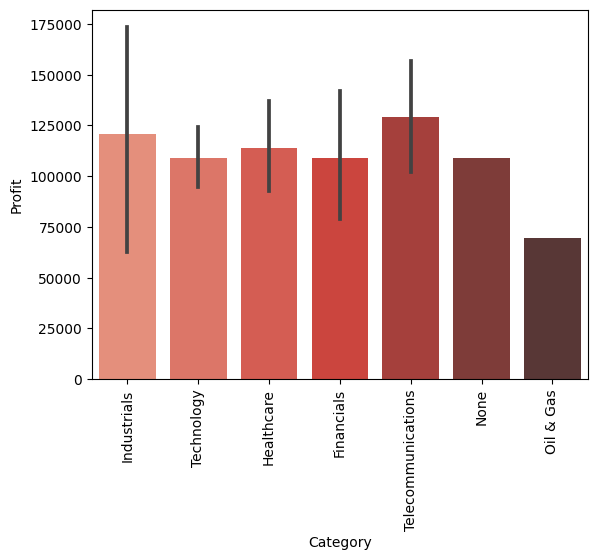

In [90]:
# Профит в разрезе категории

sb.barplot(x='Category', y='Profit', data=train, palette = "Reds_d")
pl.xticks(rotation=90)


## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [91]:
# One-Hot преобразование тренировочного датасета
train = pd.get_dummies(train,columns=['State', 'Category'])

# Удалим целевую переменную 
train = train.drop(columns=['Profit'])



In [92]:
# Посмотрим несколько первых строк для отслеживания преобразований данных
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0,0


In [142]:
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0


In [94]:
# Проверим количество строк и столбцов
train.shape

(50, 13)

In [96]:
# One-Hot преобразование тестового датасета
test = pd.get_dummies(test, columns = ['State', 'Category'])


In [97]:
# Посмотрим несколько первых строк для отслеживания преобразований данных
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [98]:
# Проверим количество строк и столбцов
test.shape

(50, 13)

In [99]:
# Удалим лишние столбцы
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

* ### StandardScaler

In [ ]:
#Здесь нормализация не нужна, так что пропустим

* ### Creating datasets for ML part

In [145]:
# установим в качестве 'X' тренировочный датасет
X = train

# установим в качестве 'y' целевую переменную (у нас это "Profit")
y = target
print(len(y))

# 'X_Test' будет представлен тестовым датасетом
X_Test = test

50


* ### 'Train\Test' split

In [118]:
#Разделим тренировочный сет на тренировочный и валидационный. Под валидацию отдаем 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [119]:
#Проверим количество данных в валидационном сете
X_test.shape

(15, 12)

In [144]:
X_Test.shape

(50, 12)

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [120]:
# Модель линейной регрессии
LR = LinearRegression()


# Тренируем модель
LR.fit(X_train,y_train)

# Делаем предсказание
LR_pred = LR.predict(X_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [121]:
# Считаем R2
LRscore = LR.score(X_test, y_test)

In [122]:
# Метрики модели
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.789688,11029.42834,2.030035e+08,14247.930908,0.019417,0.139346


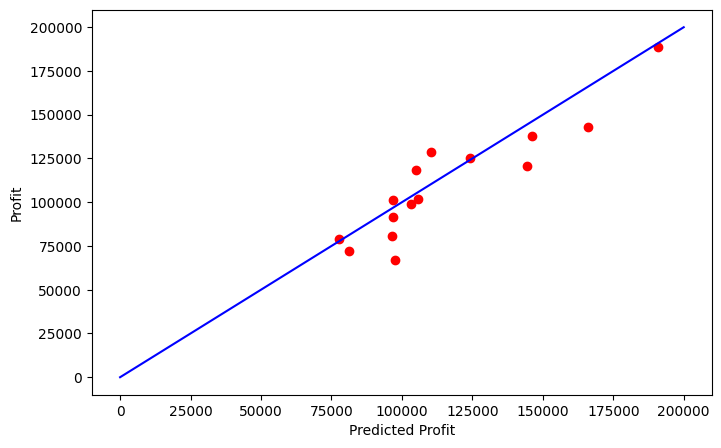

In [115]:
# Визуализируем предсказанные и реальные значения

pl.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [123]:
# Окончательные прогнозы для тестового датасета
LR_pred1 = LR.predict(X_Test)
LR_pred1

array([173426.18101741, 189136.03555658, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [124]:
# Метрики модели
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.48225,2.756271e+08,16602.021239,0.077744,0.278826


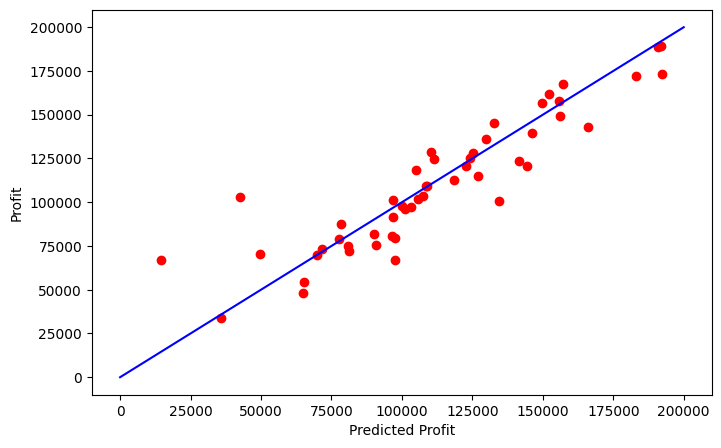

In [126]:
# Визуализируем предсказанные и реальные значения

pl.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [143]:
print(len(y))
print(len(LR_pred1))

50
50


In [138]:
# сравнение "фактической прибыли" из набора данных Train и прогнозируемой прибыли из тестового набора данных
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Reds')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


* #### Gradient Boosting Regressor

In [130]:
GB=GradientBoostingRegressor(random_state=0)

# Тренируем модель
GB.fit(X_train,y_train)

# Делаем предсказание
GB_pred = GB.predict(X_test)

# Считаем R2
GBscore =GB.score(X_test, y_test)

In [131]:
# # Окончательные прогнозы для тестового датасета
GB_pred1 = GB.predict(X_Test)

In [132]:
# Метрики модели
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


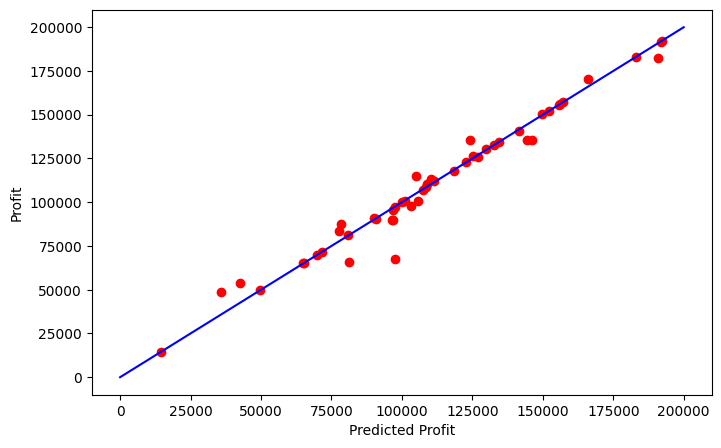

In [134]:
# Визуализация сравнения реальных и предсказанных результатов

# Plot outputs
pl.figure(figsize=(8,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

### Model comparison

In [135]:
# Результаты работы двух моделей для сравнения показателей
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.482250,2.756271e+08,16602.021239,0.077744,0.278826
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


In [136]:
# Сравнение "фактической прибыли" из набора данных Train и прогнозируемой прибыли из тестового набора данных (по двух моделям)
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Reds')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192261.830000,173426.181017,191867.624129
1,191792.060000,189136.035557,191631.052384
2,191050.390000,188946.035741,182312.330201
3,182901.990000,172036.552176,182851.070198
4,166187.940000,142782.308756,170184.031177
5,156991.120000,167404.746140,156991.181748
6,156122.510000,149507.668697,156065.183378
7,155752.600000,157587.392262,155657.315655
8,152211.770000,161999.462058,152090.773106
9,149759.960000,156553.515380,150395.829435


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [140]:
# Сохраним полученные результаты в .csv файл "StartupPredictions.csv"
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)